In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [10]:
df['last_review'] = df['last_review'].fillna('No Review')

In [11]:
df = df.dropna(subset=['name', 'host_name'])

In [12]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
df.shape

(48858, 16)

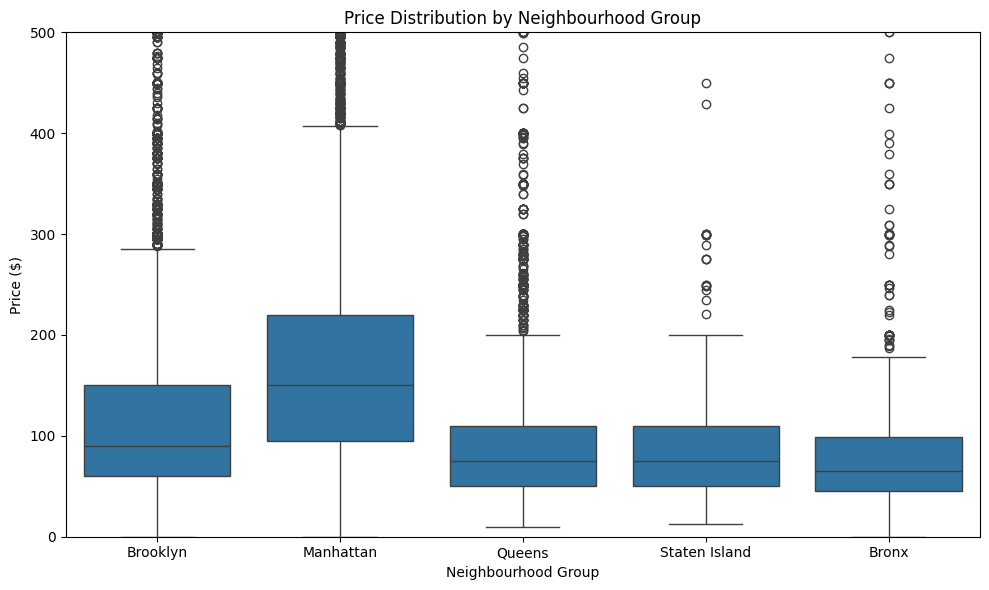

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Price Distribution by Neighbourhood Group')
plt.ylabel('Price ($)')
plt.xlabel('Neighbourhood Group')
plt.ylim(0, 500)  # Cap extreme outliers
plt.tight_layout()
plt.savefig('images/price_distribution.png')
plt.show()

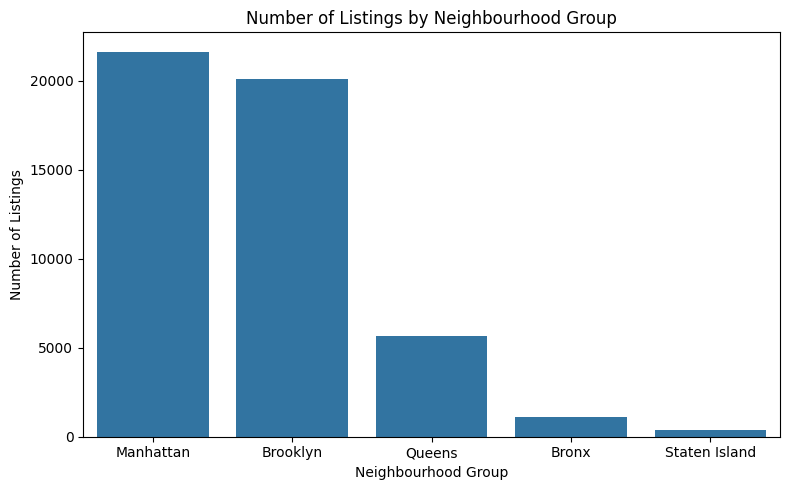

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index)
plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.savefig('images/neighbourhood_counts.png')
plt.show()

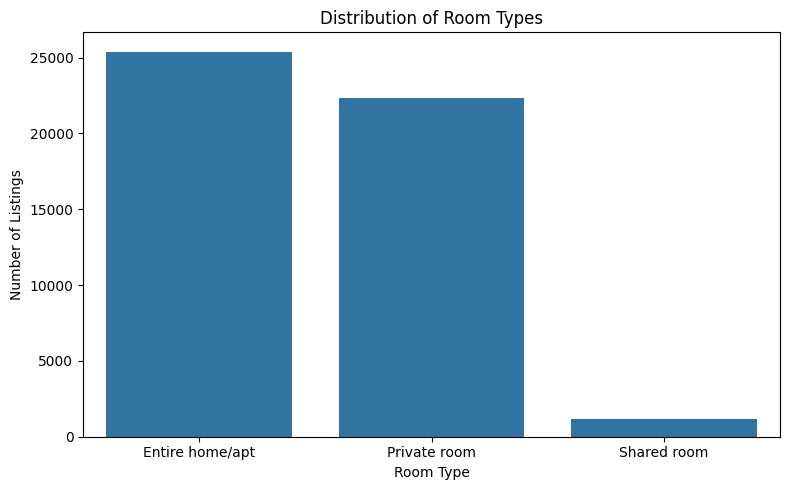

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.savefig('images/room_type_distribution.png')
plt.show()

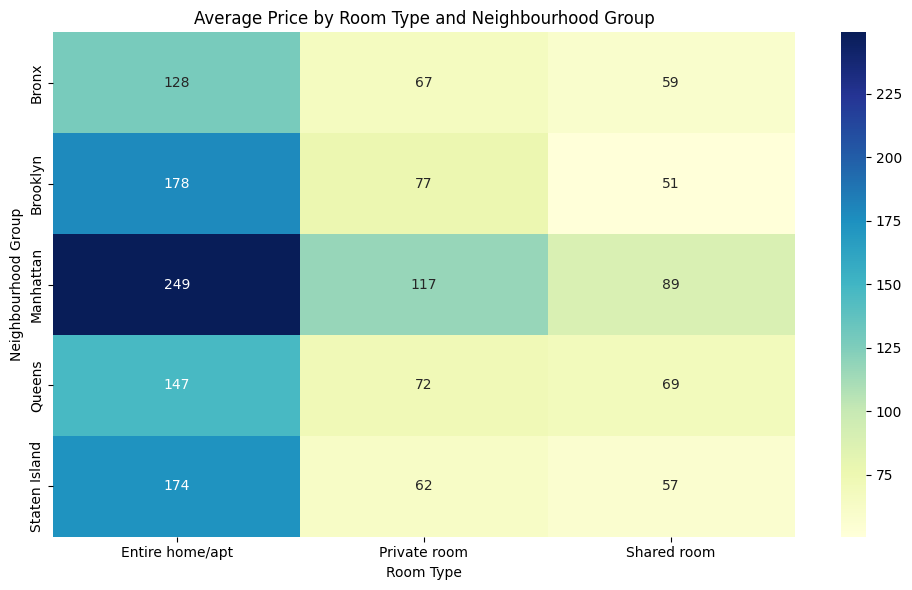

In [17]:
pivot = df.pivot_table(index='neighbourhood_group', columns='room_type', values='price', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Price by Room Type and Neighbourhood Group')
plt.xlabel('Room Type')
plt.ylabel('Neighbourhood Group')
plt.tight_layout()
plt.savefig('images/avg_price_heatmap.png')
plt.show()

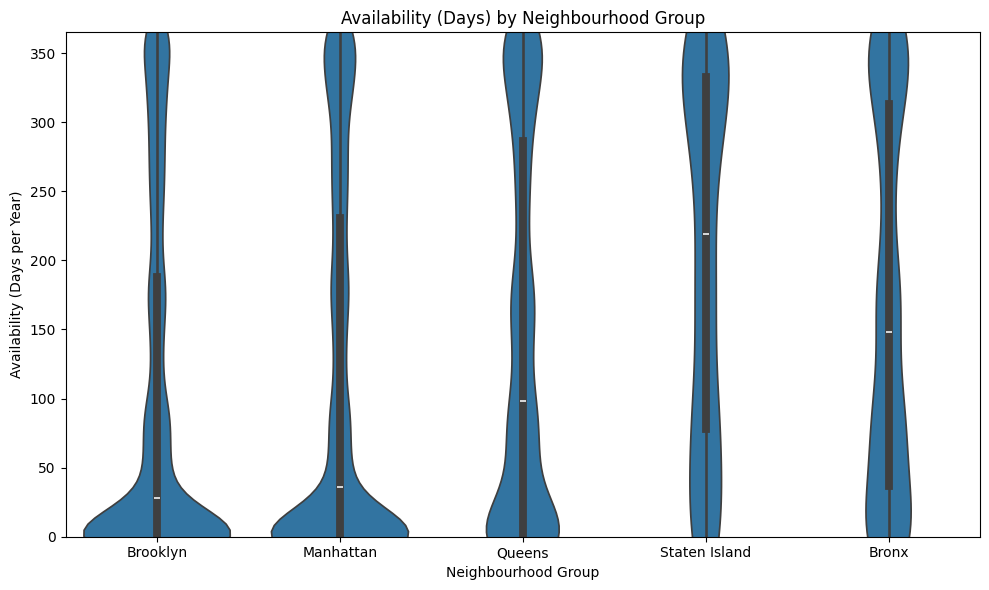

In [18]:
plt.figure(figsize=(10,6))
sns.violinplot(x='neighbourhood_group', y='availability_365', data=df)
plt.title('Availability (Days) by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Availability (Days per Year)')
plt.ylim(0, 365)
plt.tight_layout()
plt.savefig('images/availability_violin.png')
plt.show()

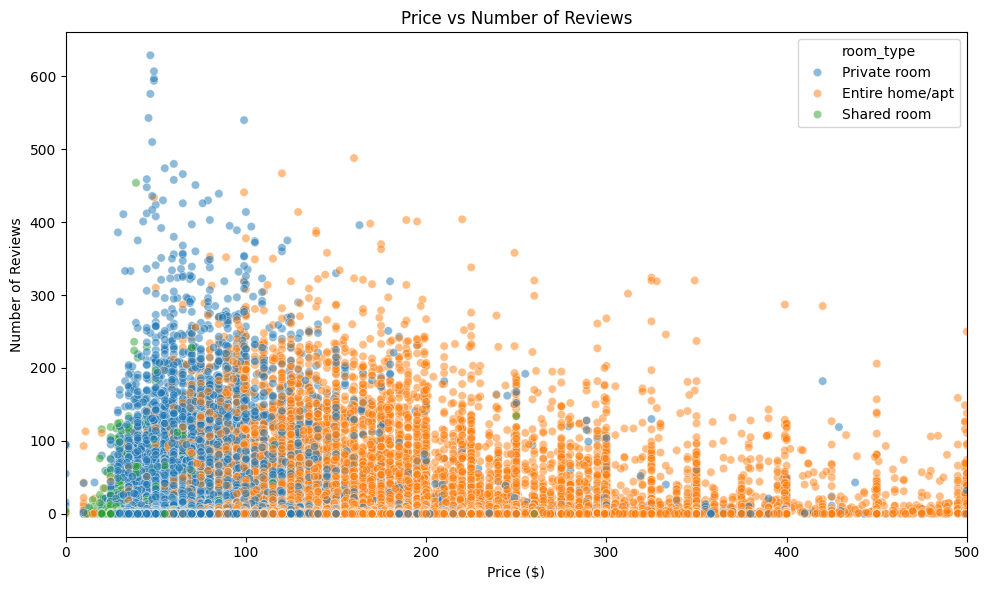

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='number_of_reviews', hue='room_type', data=df, alpha=0.5)
plt.title('Price vs Number of Reviews')
plt.xlabel('Price ($)')
plt.ylabel('Number of Reviews')
plt.xlim(0, 500)
plt.tight_layout()
plt.savefig('images/reviews_price_scatter.png')
plt.show()

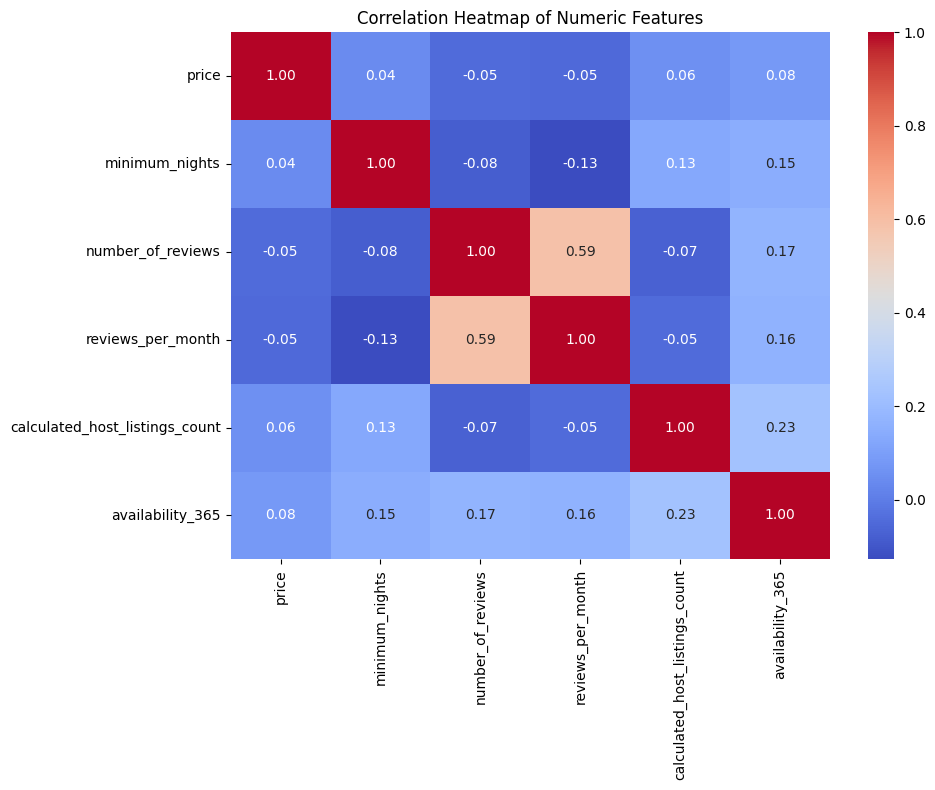

In [20]:
plt.figure(figsize=(10,8))
numeric_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.savefig('images/correlation_heatmap.png')
plt.show()

In [21]:
df.to_csv('airbnb_nyc_cleaned.csv', index=False)